In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

2023-04-02 17:34:26.327749: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-02 17:34:26.354984: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 17:34:26.824069: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0].shape

(32, 32, 3)

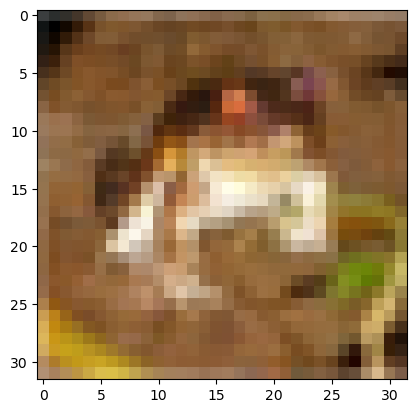

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train[0].max()

255

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train, 10)

In [13]:
y_cat_test = to_categorical(y_test, 10)

In [14]:
y_train[0]

array([6], dtype=uint8)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [16]:
32*32*3

3072

In [17]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(32, 32, 3), activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())


model.add(Dense(256, activation="relu"))

model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

2023-04-02 17:34:28.848527: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-02 17:34:28.868463: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
earlyStop = EarlyStopping(monitor="val_loss", patience=2)

In [21]:
model.fit(X_train, y_cat_train, epochs=15, validation_data=(X_test, y_cat_test), callbacks=[earlyStop])

Epoch 1/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4921 - accuracy: 0.4591 - val_loss: 1.2842 - val_accuracy: 0.5459
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1603 - accuracy: 0.5887 - val_loss: 1.1350 - val_accuracy: 0.6025
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0223 - accuracy: 0.6418 - val_loss: 1.0200 - val_accuracy: 0.6384
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9167 - accuracy: 0.6794 - val_loss: 0.9838 - val_accuracy: 0.6578
Epoch 5/15
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8382 - accuracy: 0.7084 - val_loss: 0.9660 - val_accuracy: 0.6652
Epoch 6/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7615 - accuracy: 0.7355 - val_loss: 0.9320 - val_accuracy: 0.6787
Epoch 7/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6983 - accuracy: 0.7575 - val_loss: 0.9268 - val_accuracy:

In [22]:
metrics = pd.DataFrame(model.history.history)

In [23]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.492075,0.45912,1.284164,0.5459
1,1.160318,0.58874,1.135010,0.6025
2,1.022250,0.64178,1.020019,0.6384
3,0.916664,0.67944,0.983834,0.6578
4,0.838166,0.70840,0.966042,0.6652
5,0.761545,0.73550,0.932046,0.6787
6,0.698282,0.75750,0.926760,0.6892
7,0.636240,0.77904,0.943127,0.6860
8,0.579634,0.79750,0.962484,0.6866


In [24]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<Axes: >

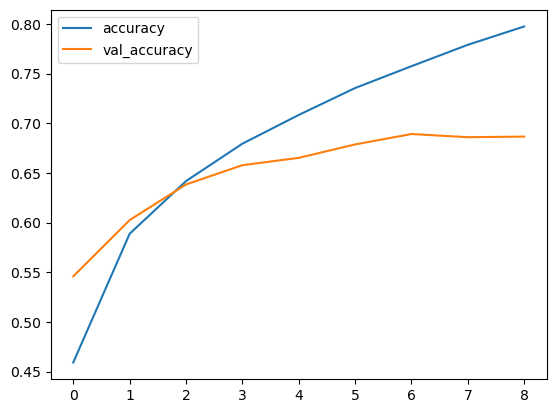

In [25]:
metrics[["accuracy", "val_accuracy"]].plot()

<Axes: >

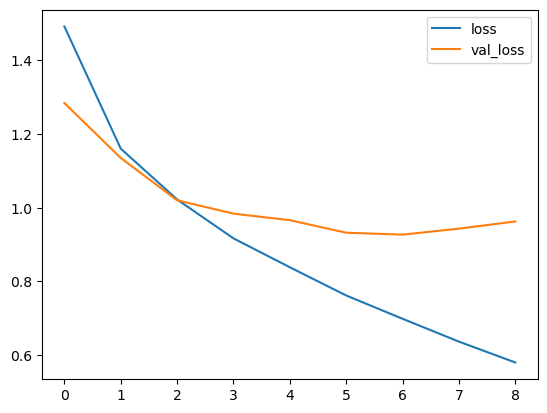

In [26]:
metrics[["loss", "val_loss"]].plot()

In [27]:
model.evaluate(X_test, y_cat_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9625 - accuracy: 0.6866


[0.9624843001365662, 0.6866000294685364]

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
predictions = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 1s 3ms/step


In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      1000
           1       0.78      0.83      0.80      1000
           2       0.57      0.60      0.59      1000
           3       0.50      0.50      0.50      1000
           4       0.71      0.57      0.64      1000
           5       0.54      0.64      0.59      1000
           6       0.79      0.74      0.76      1000
           7       0.72      0.74      0.73      1000
           8       0.82      0.76      0.78      1000
           9       0.78      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [32]:
confusion_matrix(y_test, predictions)

array([[741,  36,  58,  19,  14,   8,   8,  17,  64,  35],
       [ 19, 834,   8,  10,   1,  10,   7,   8,  24,  79],
       [ 59,  15, 600,  65,  49,  96,  54,  37,  15,  10],
       [ 32,  10,  72, 497,  48, 222,  45,  46,  12,  16],
       [ 27,   4, 109,  83, 574,  61,  45,  75,  18,   4],
       [ 13,   8,  56, 163,  32, 637,  21,  54,   7,   9],
       [  9,  13,  66,  82,  31,  34, 739,  11,   7,   8],
       [ 19,   4,  41,  40,  51,  86,   4, 738,   4,  13],
       [ 87,  53,  22,  19,   4,  14,   5,   3, 755,  38],
       [ 37,  96,  15,  25,   3,   8,   8,  37,  20, 751]])

In [33]:
import seaborn as sns 

<Axes: >

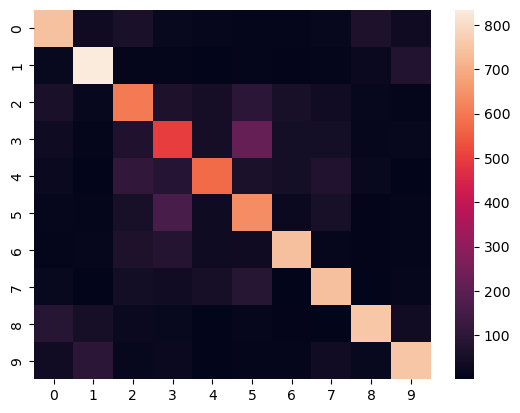

In [34]:
sns.heatmap(confusion_matrix(y_test, predictions))

In [40]:
my_img = X_test[16]

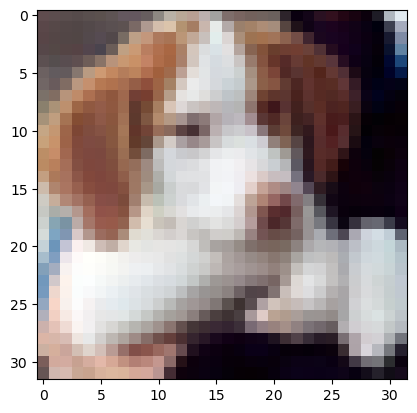

In [41]:
plt.imshow(my_img)

In [44]:
y_test[16]

array([5], dtype=uint8)

In [45]:
np.argmax(model.predict(my_img.reshape(1, 32, 32, 3)), axis=1)

1/1 [==============================] - 0s 12ms/step


array([5])